In [ ]:
import sys
!{sys.executable} -m pip install numpy;
!{sys.executable} -m pip install pandas;
!{sys.executable} -m pip install wfdb;
!{sys.executable} -m pip install matplotlib;
!{sys.executable} -m pip install scipy;
!{sys.executable} -m pip install sklearn;

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
from scipy import signal
from sklearn.linear_model import LinearRegression

In [2]:
#I, II, V1, aVR, aVL, aVF, V1, V2, V3, V4, V5, V6
record = wfdb.rdheader('00001_lr')

In [3]:
signals, fields = wfdb.rdsamp('00001_lr', channels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])  


In [4]:
leads = ["I", "II", "III", "aVL", "aVR", "aVF", "V1", "V2", "V3", "V4", "V5", "V6" ]
#for i in range(6):
 #   plt.figure(figsize=(20, 5)) 
  #  plt.plot(signals[:, i], label=leads[i])
   # plt.xlabel('Time (seconds)')
    #plt.ylabel('Voltage (mV)')
    #plt.title('ECG')
    #plt.legend()
    #plt.grid(True)
    #plt.show()

In [5]:
low_cutoff = 2.0
high_cutoff = 40.0
fs = 100.0

order = 4
nyquist = 0.5 * fs
low = low_cutoff / nyquist
high = high_cutoff / nyquist
b, a = signal.butter(order, [low, high], btype='band')

filtered = signal.lfilter(b, a, signals)

In [6]:
scaled = 2 * (filtered-np.min(filtered)) / (np.max(filtered)- np.min(filtered)) - 1

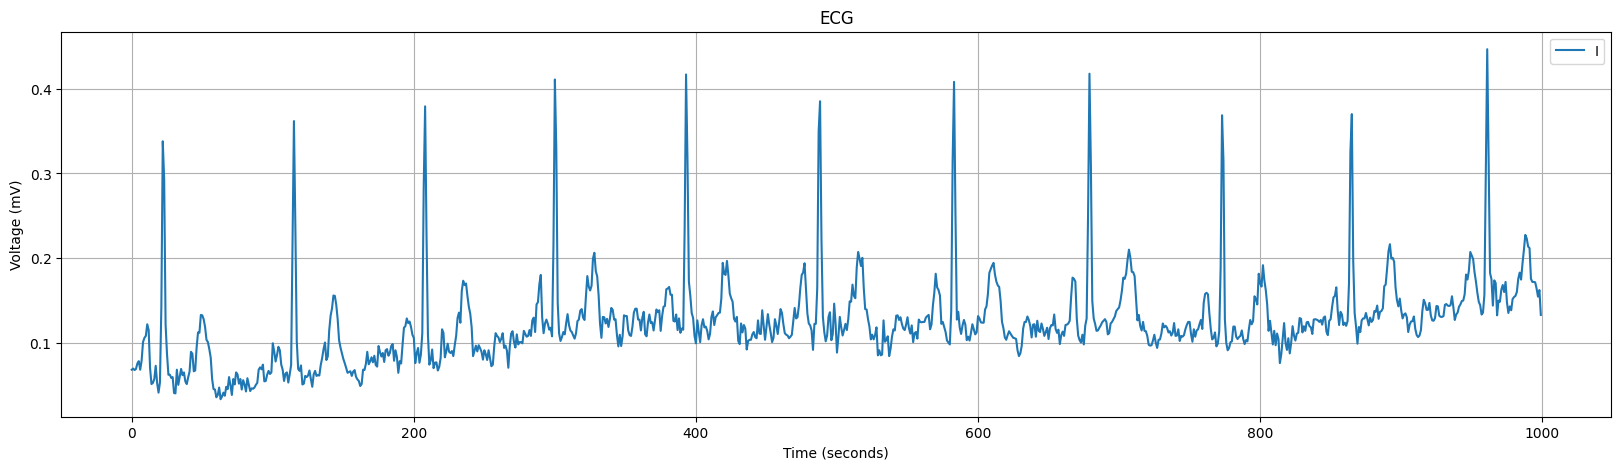

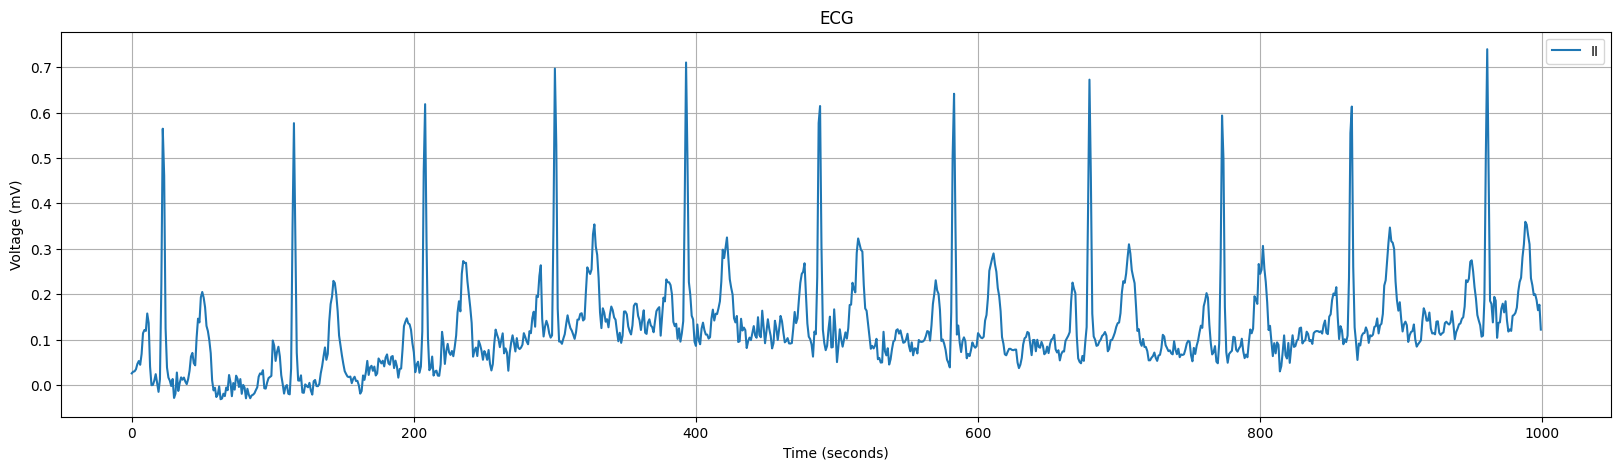

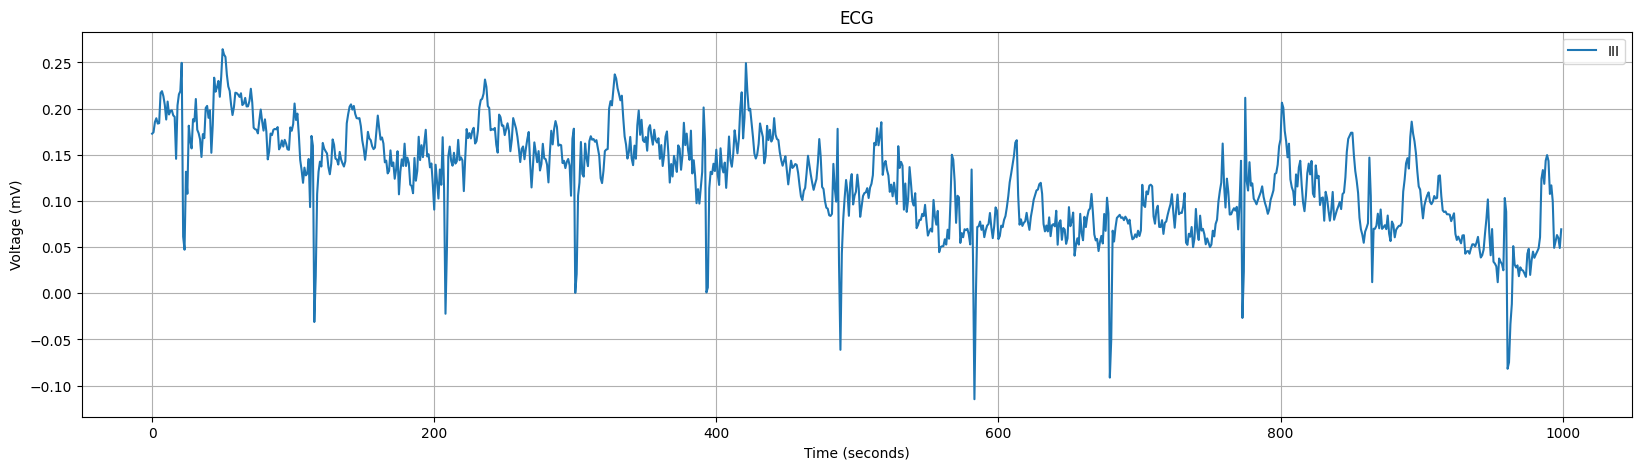

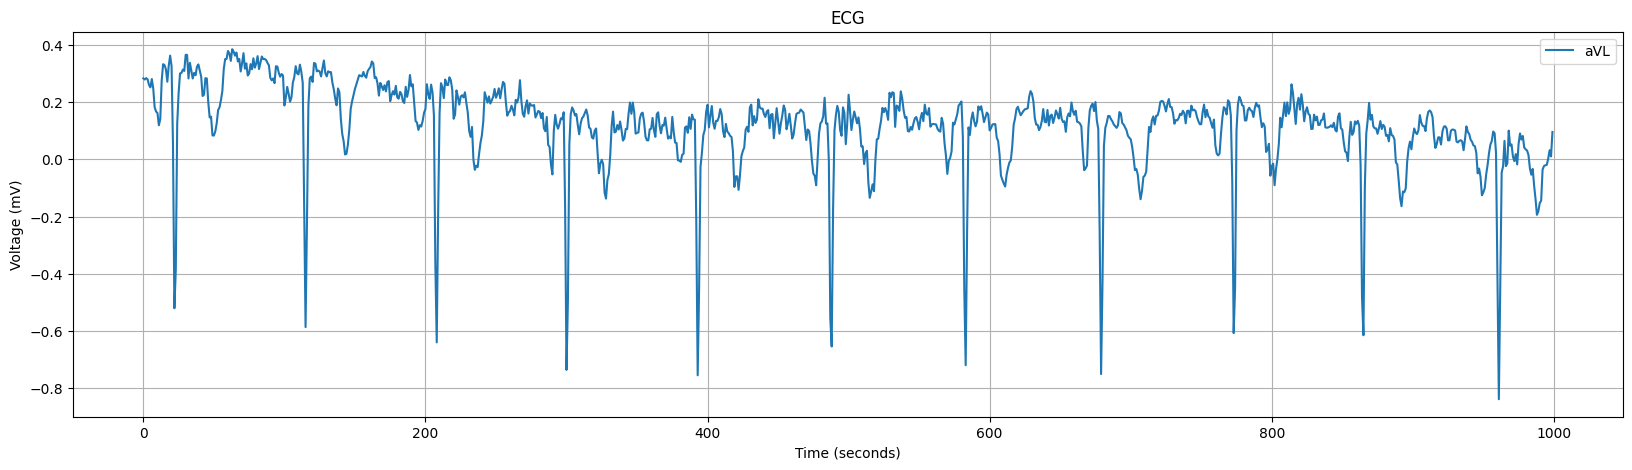

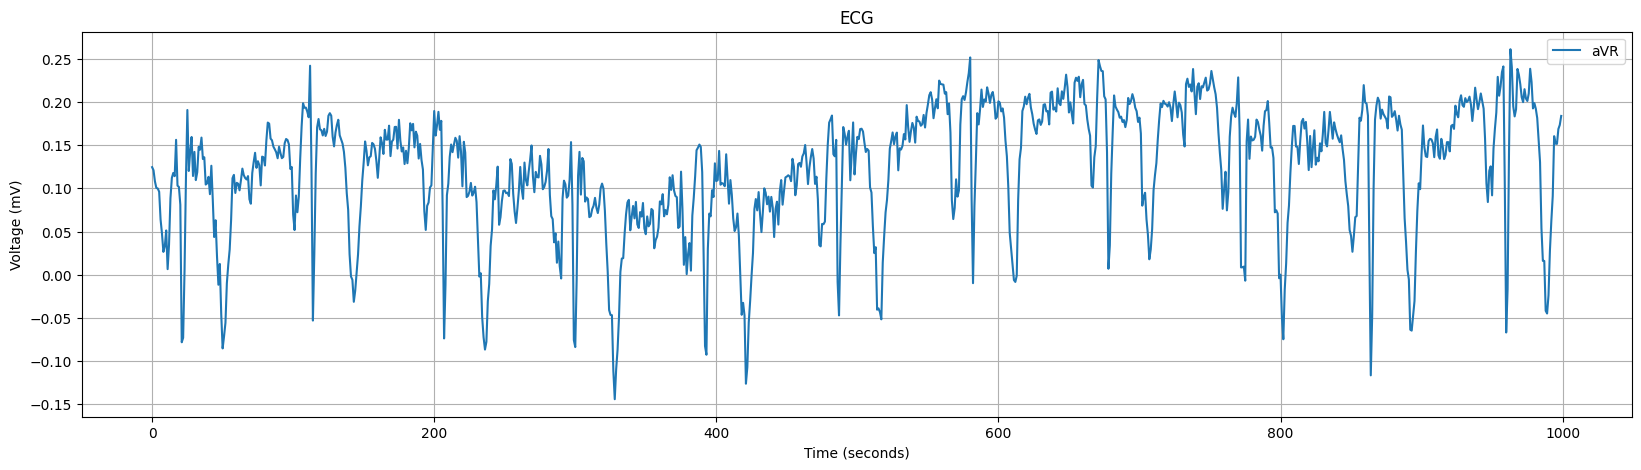

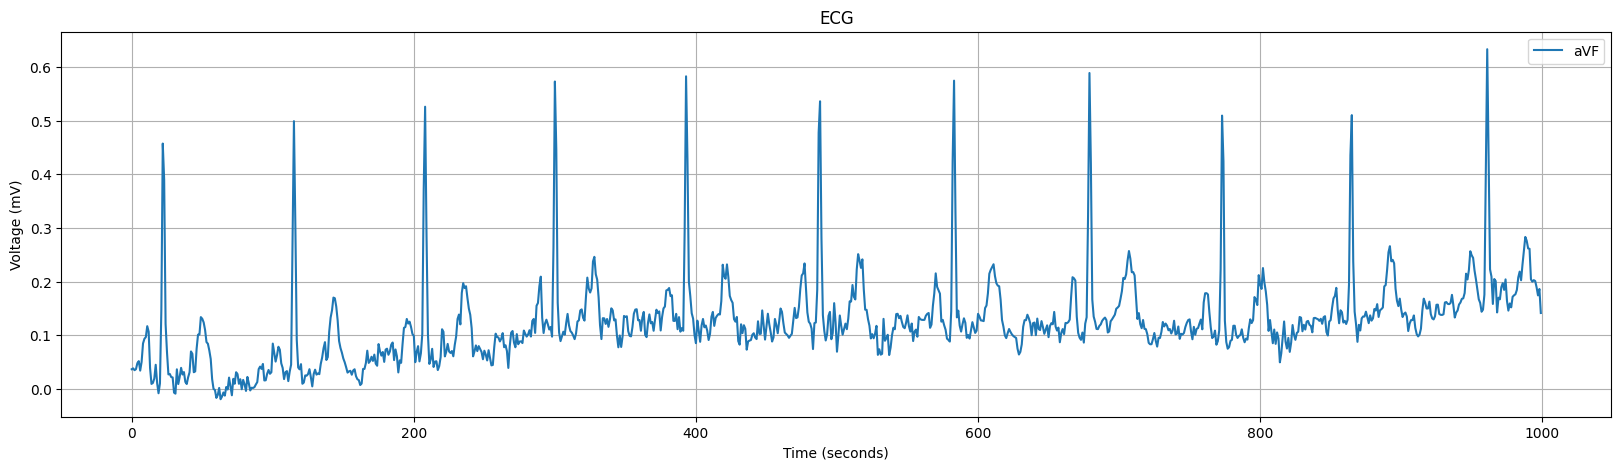

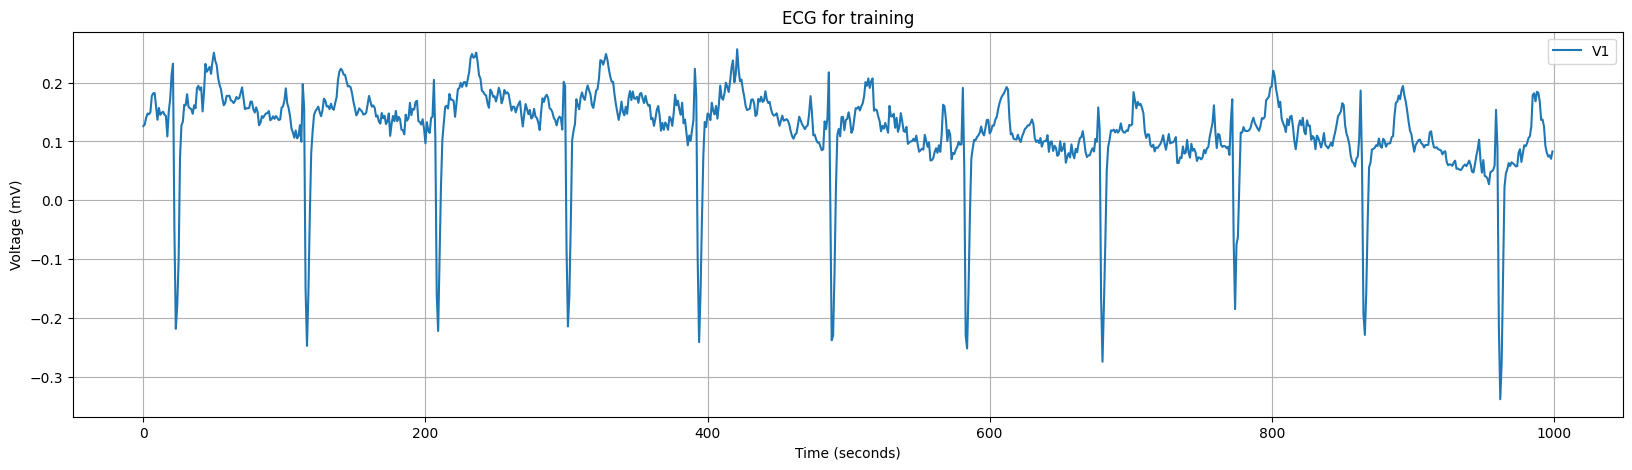

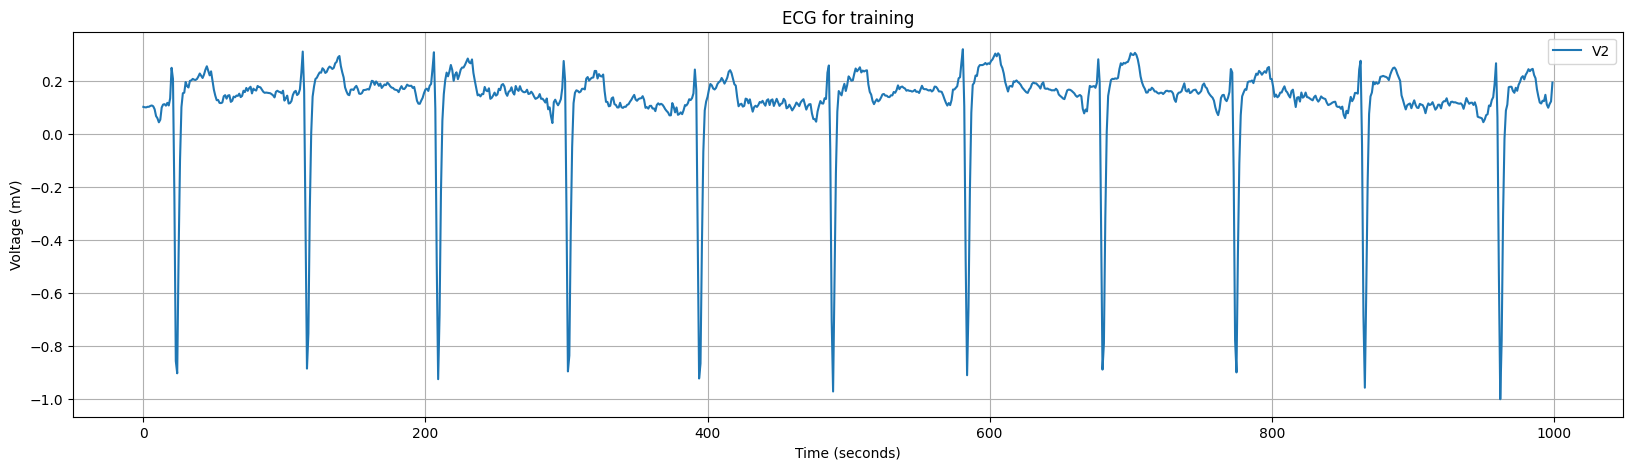

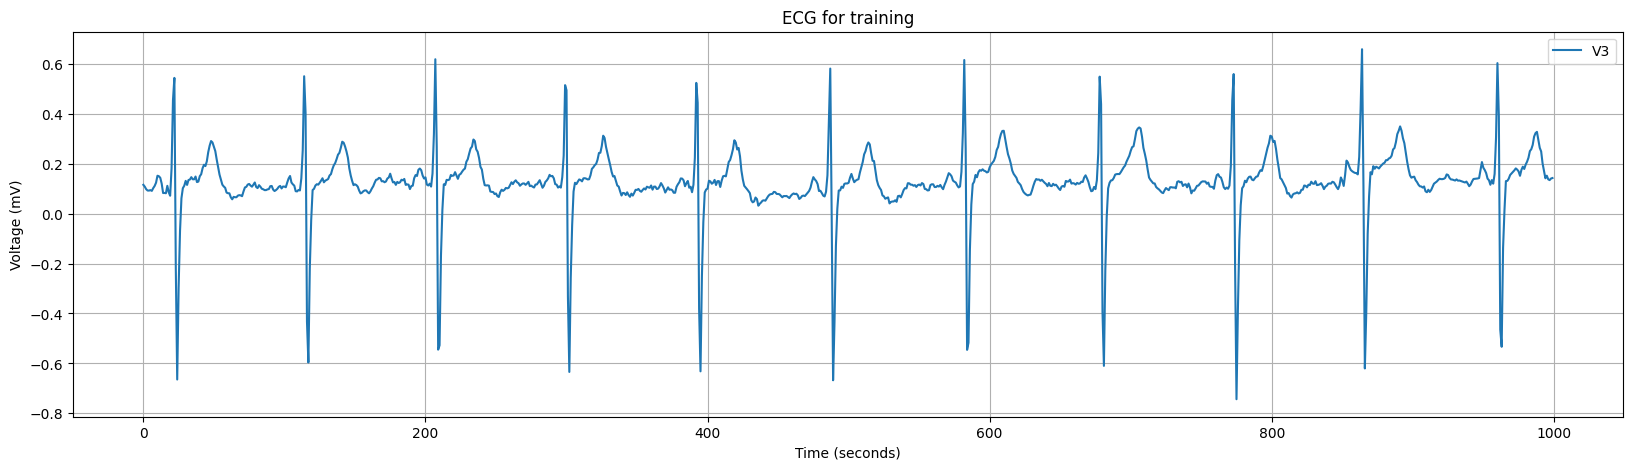

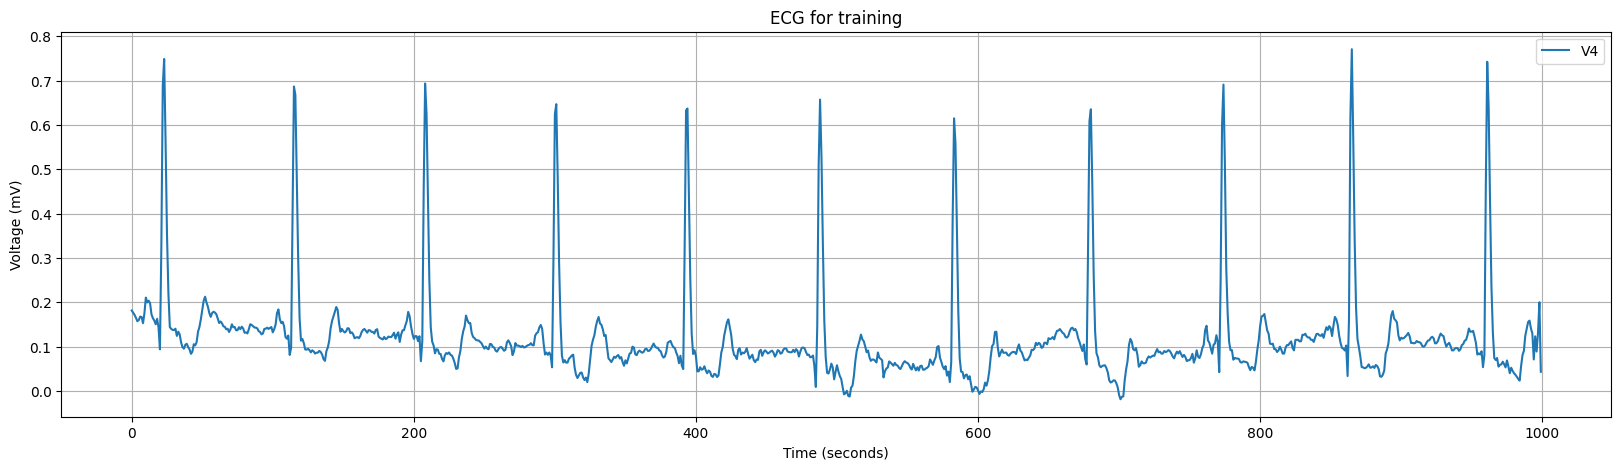

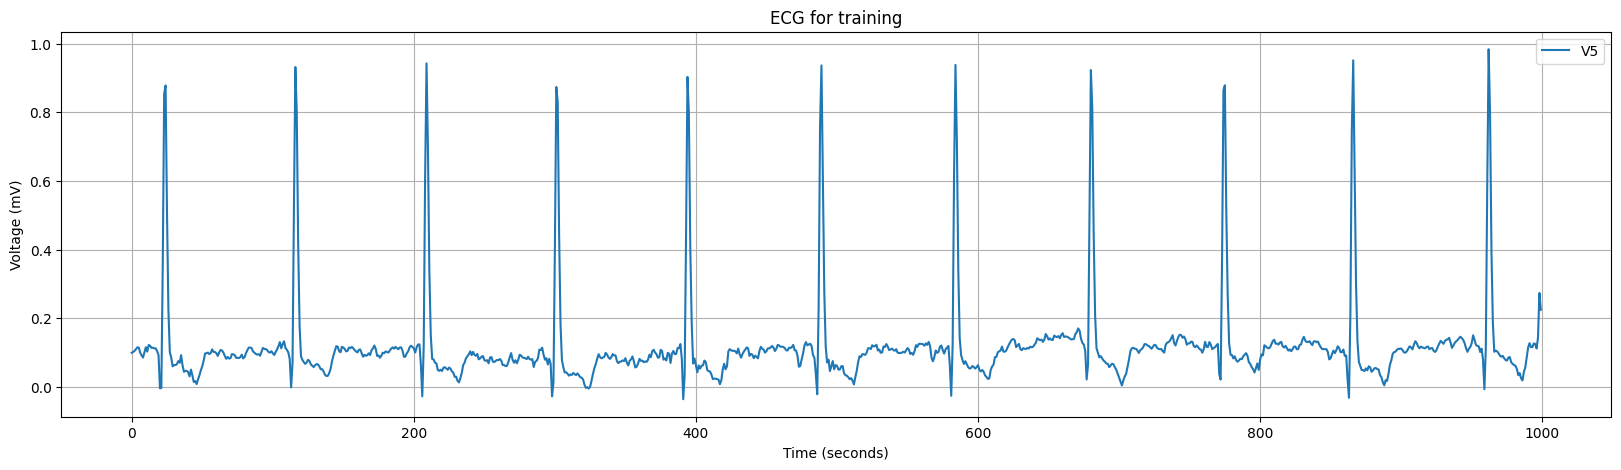

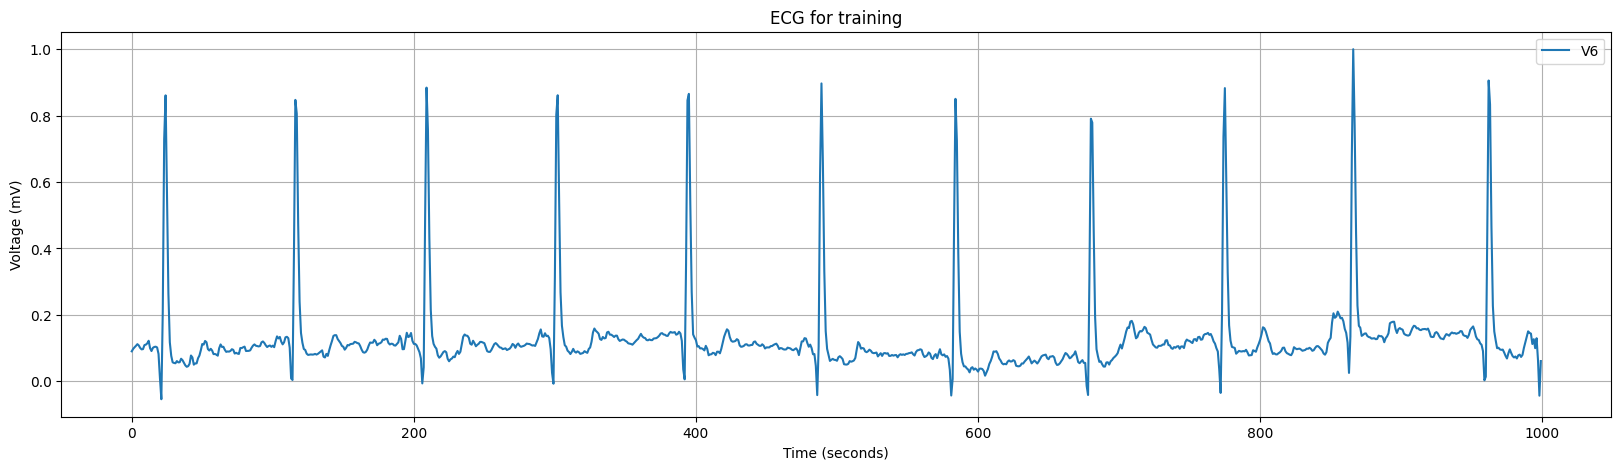

In [13]:
for i in range(6):
    plt.figure(figsize=(20, 5))
    plt.plot(scaled[:, i], label=leads[i])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Voltage (mV)')
    plt.title('ECG')
    plt.legend()
    plt.grid(True)
    plt.show()
    

for i in range(6, 12):
    plt.figure(figsize=(20, 5))
    plt.plot(scaled[:, i], label=leads[i])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Voltage (mV)')
    plt.title('ECG for training')
    plt.legend()
    plt.grid(True)
    plt.show()

In [9]:
ecg_data = scaled

X = ecg_data[:, :6]
Y = ecg_data[:, 6:] 

def loss_function(predictions, targets):
    return np.mean(np.abs(predictions - targets))

model = LinearRegression()
model.fit(X, Y)

upscaled_v1_v6 = model.predict(X)
ecg_data = np.hstack((ecg_data, upscaled_v1_v6))

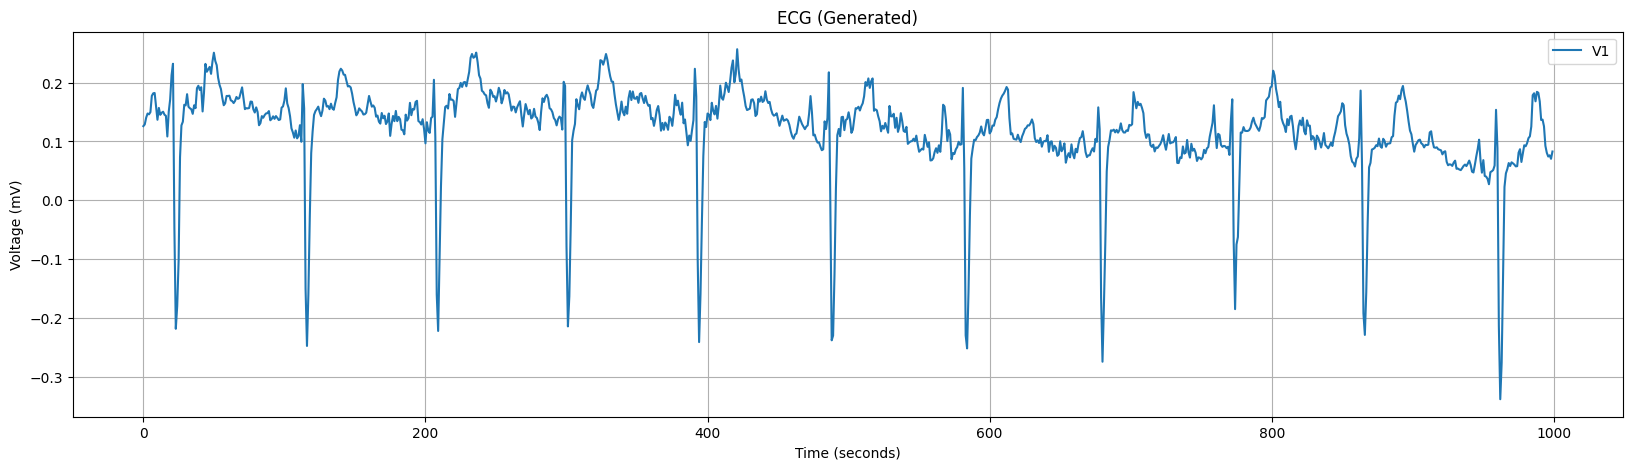

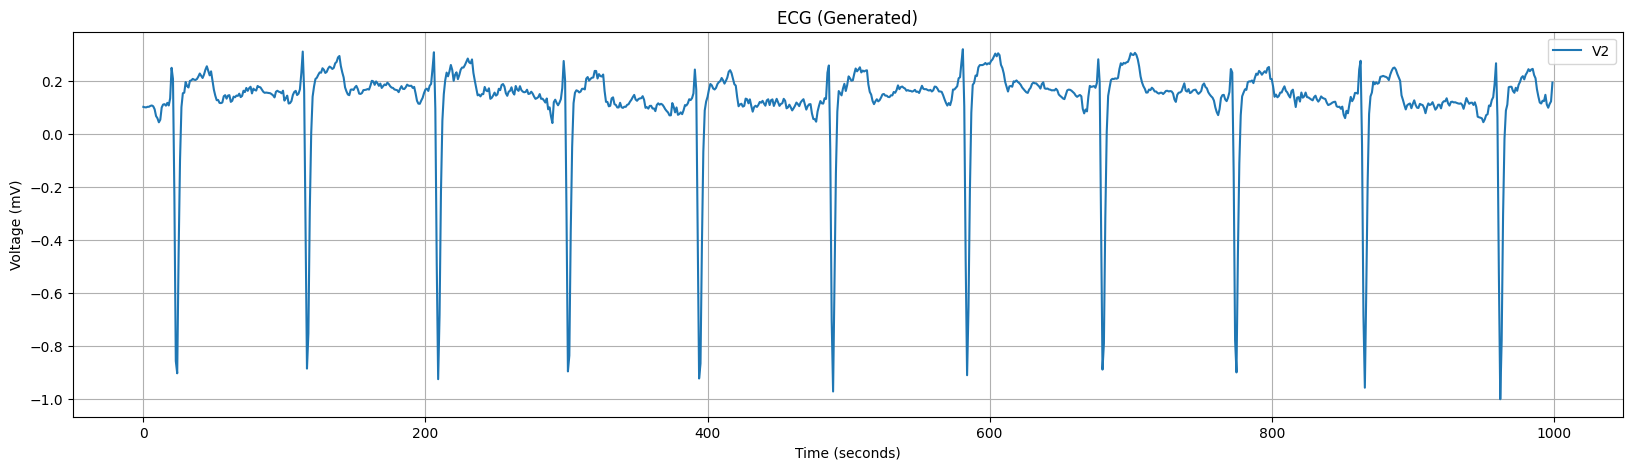

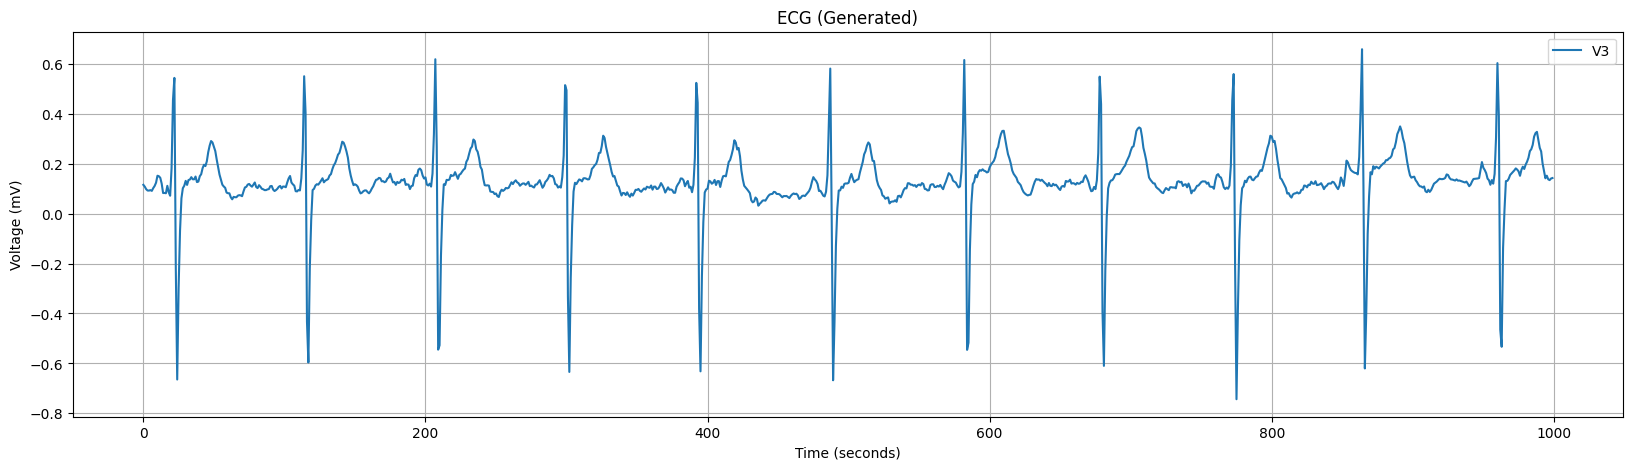

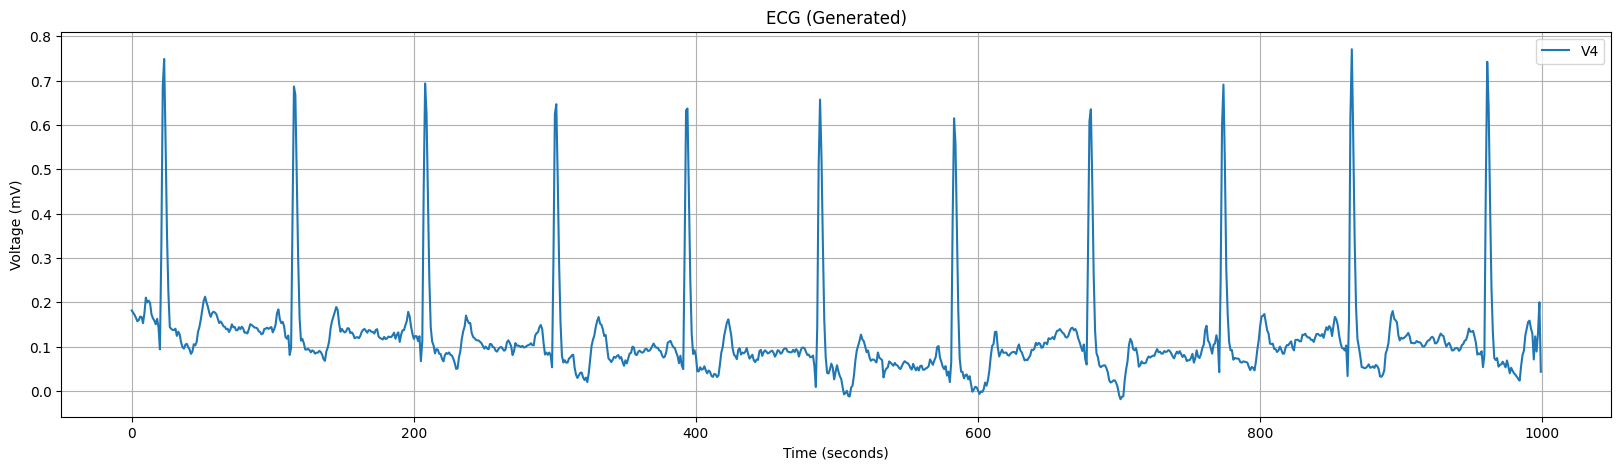

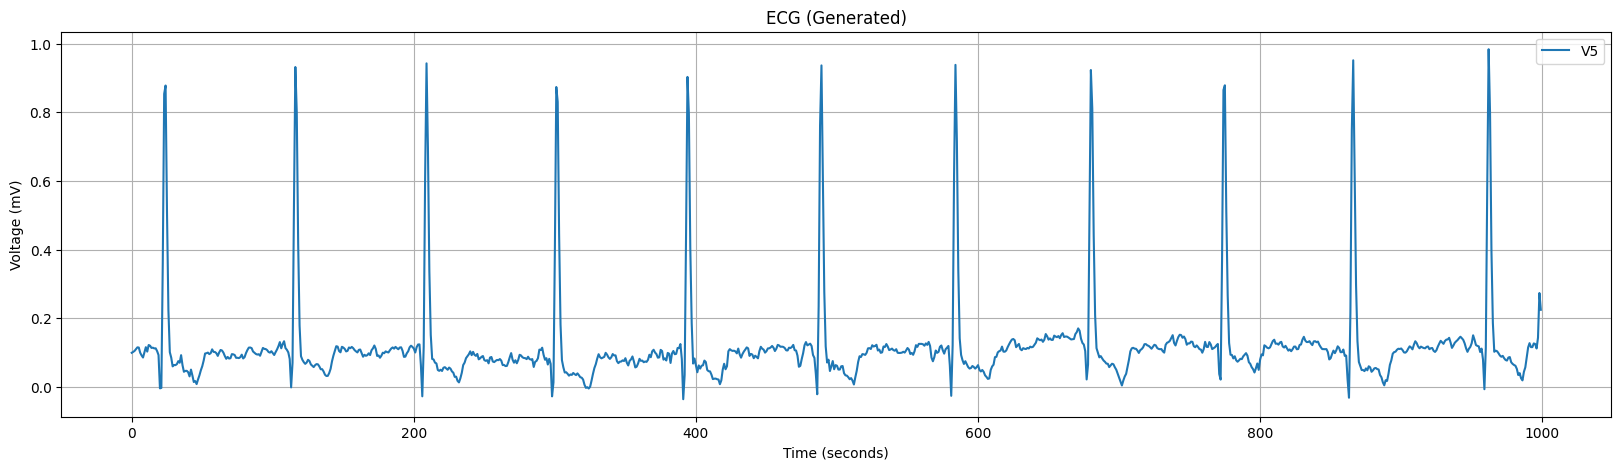

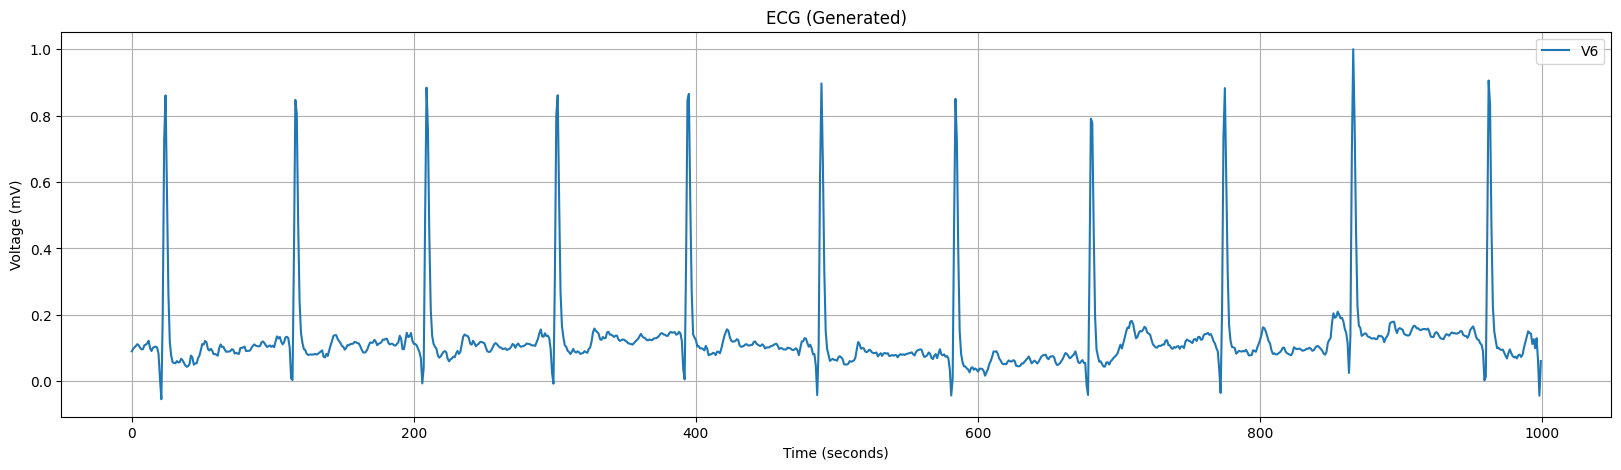

In [16]:
for i in range(6,12):
    plt.figure(figsize=(20, 5))
    plt.plot(ecg_data[:, i], label=leads[i])
    plt.xlabel('Time (seconds)')
    plt.ylabel('Voltage (mV)')
    plt.title('ECG (Generated)')
    plt.legend()
    plt.grid(True)
    plt.show()